In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pathlib
from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'datasets'
# data_dir

In [3]:
data_dir = pathlib.Path(data_dir)
# data_dir

In [4]:
# list(data_dir.glob('*/*.png'))[:5]

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
# print(image_count)

In [6]:
ripes = list(data_dir.glob('ripe/*png'))
# ripes[:5]

In [7]:
durian_heatmap_dict = {
  'ripe' : list(data_dir.glob('ripe/*')),
   'unripe' : list(data_dir.glob('unripe/*')),
}

durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}

In [8]:
durian_heatmap_dict['ripe'][:5]

[WindowsPath('datasets/ripe/heatmap_10_percobaan_1.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_2.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_3.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_4.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_5.png')]

In [9]:
str(durian_heatmap_dict['ripe'][0])

'datasets\\ripe\\heatmap_10_percobaan_1.png'

In [10]:
img = cv2.imread(str(durian_heatmap_dict['ripe'][0]))
resized_img = cv2.resize(img,(200,200))
resized_img.shape

(200, 200, 3)

In [11]:
X, y = [], []

output_folder = "resized_images"

for durian_ripeness, images in durian_heatmap_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(durian_labels_dict[durian_ripeness])
        
        # Uncomment if you want to check all the resized images
        # output_name = f"{durian_ripeness}_{index}.jpg"
        # output_path = os.path.join(output_folder, output_name)
        # cv2.imwrite(output_path, resized_img)

In [12]:
X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train / 255
X_test = X_test / 255

In [13]:
convDim = 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(8, activation='relu'),    
    tf.keras.layers.Dropout(0.25),  # Add dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\induction motor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,432,817 (66.50 MB)

 Trainable params: 17,432,817 (66.50 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
EPOCH = 50
BATCH_SIZE = 32
model_fit = model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_test, y_test), batch_size=BATCH_SIZE) 

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.5908 - loss: 1.1539 - val_accuracy: 0.3684 - val_loss: 0.6898
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.6131 - loss: 0.8341 - val_accuracy: 0.3684 - val_loss: 0.6867
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.6146 - loss: 0.6633 - val_accuracy: 0.4737 - val_loss: 0.6840
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.5908 - loss: 0.6057 - val_accuracy: 1.0000 - val_loss: 0.6876
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step - accuracy: 0.5565 - loss: 0.6210 - val_accuracy: 1.0000 - val_loss: 0.6893
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.6801 - loss: 0.5847 - val_accuracy: 0.4737 - val_loss: 0.6827
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.5670 - loss: 0.5690 - val_accuracy: 0.4211 - val_loss: 0.6708
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.5134 - loss: 0.5579 - val_accuracy: 0.4737 - val_loss:

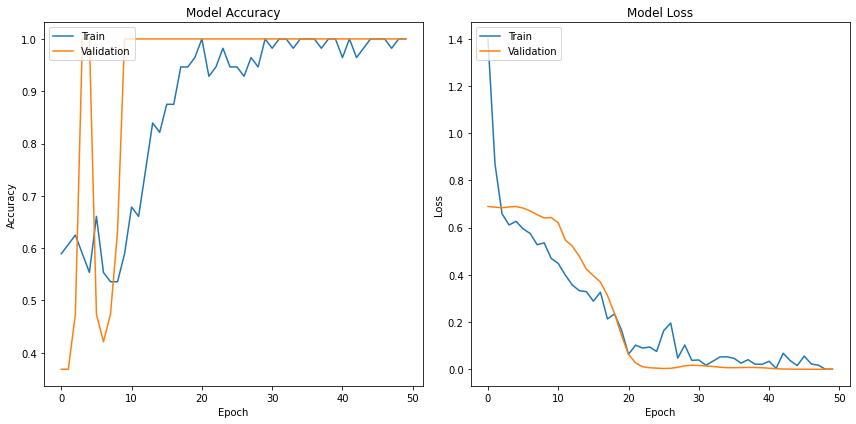

In [15]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

1/1 - 0s - 48ms/step - accuracy: 1.0000 - loss: 6.1761e-05
1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


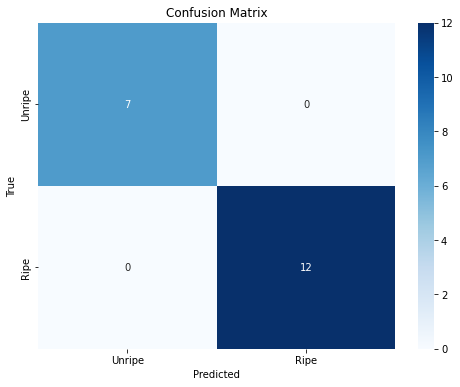

In [17]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# save model to .keras file
# model.save("saved model/Conv5-Gas.h5")``